In [ ]:
!pip install pydub

In [ ]:
!pip install tqdm

In [ ]:
!pip install noisereduce

In [ ]:
!pip install soundfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import librosa
import noisereduce as nr
import soundfile as sf
import numpy as np
from tqdm import tqdm

# Define paths and folders
audio_folder_path = '/content/drive/MyDrive/Audio2/'
clean_folder_path = '/content/drive/MyDrive/clean_audio/'

# Create the clean_audio folder if it doesn't exist
if not os.path.exists(clean_folder_path):
    os.makedirs(clean_folder_path)

# Function to check if audio is already cleaned
def is_cleaned(audio_file, clean_folder):
    return os.path.exists(os.path.join(clean_folder, audio_file))

# Function to clean audio
def clean_audio(input_path, output_path):
    # Load the audio file
    audio, sr = librosa.load(input_path, sr=None)

    # Apply noise reduction
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)

    # Save the clean audio
    sf.write(output_path, reduced_noise, sr)

    return audio, reduced_noise

# Flag to track if all audio files have been processed
all_files_processed = True

# Clean audio files in the Audio2 directory
for audio_file in tqdm(os.listdir(audio_folder_path)):
    if audio_file.endswith('.wav') and not is_cleaned(audio_file, clean_folder_path):
        all_files_processed = False  # Set the flag to False
        input_path = os.path.join(audio_folder_path, audio_file)
        output_path = os.path.join(clean_folder_path, audio_file)

        # Clean the audio and save it (no need to assign to variables)
        clean_audio(input_path, output_path)

print("Sample audio cleaning and saving completed.")


100%|██████████| 188/188 [16:41<00:00,  5.33s/it]

Sample audio cleaning and saving completed.


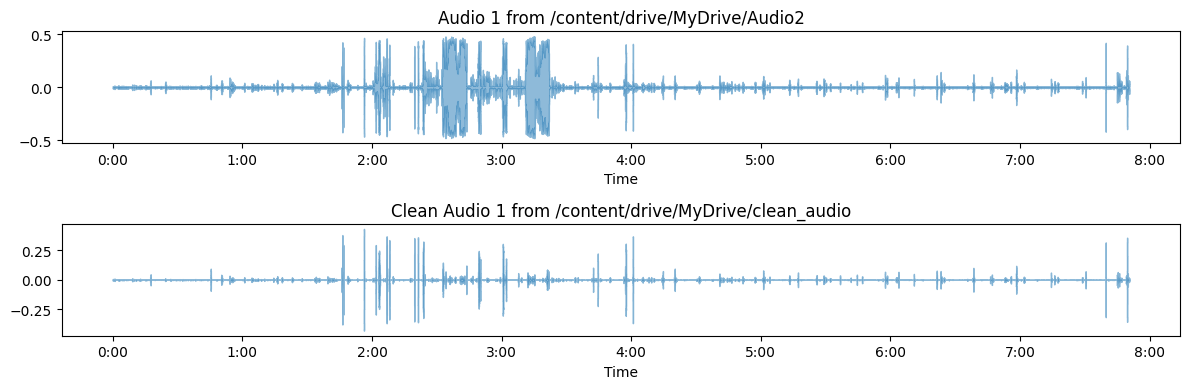

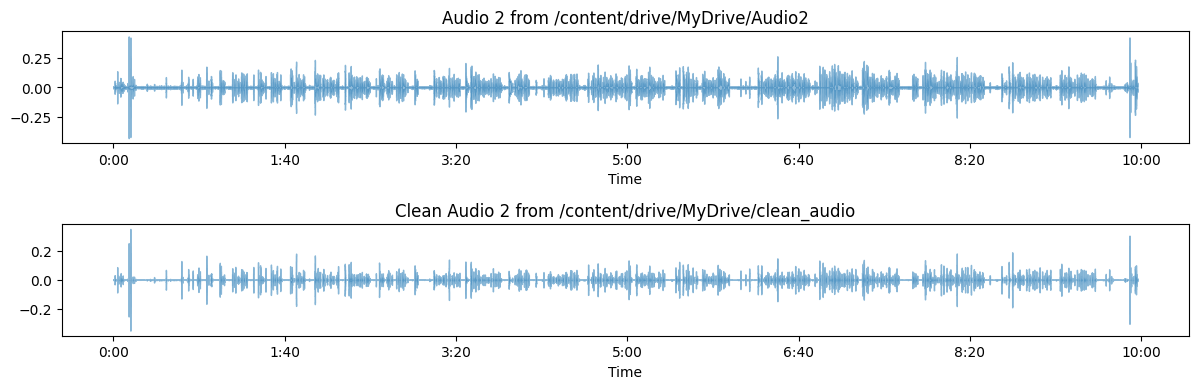

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_folder_path = '/content/drive/MyDrive/Audio2'
clean_folder_path = '/content/drive/MyDrive/clean_audio'

# Get a list of audio files in the directories
audio_files = os.listdir(audio_folder_path)
clean_files = os.listdir(clean_folder_path)

# Sort the files to ensure consistency
audio_files.sort()
clean_files.sort()

# Visualize the first two audio graphs
for i in range(2):
    audio_file = os.path.join(audio_folder_path, audio_files[i])
    clean_file = os.path.join(clean_folder_path, clean_files[i])

    # Load audio files using librosa
    audio, _ = librosa.load(audio_file, sr=None)
    clean_audio, _ = librosa.load(clean_file, sr=None)

    # Plot the audio waveform
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio, alpha=0.5)
    plt.title(f'Audio {i + 1} from {audio_folder_path}')

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(clean_audio, alpha=0.5)
    plt.title(f'Clean Audio {i + 1} from {clean_folder_path}')

    plt.tight_layout()
    plt.show()


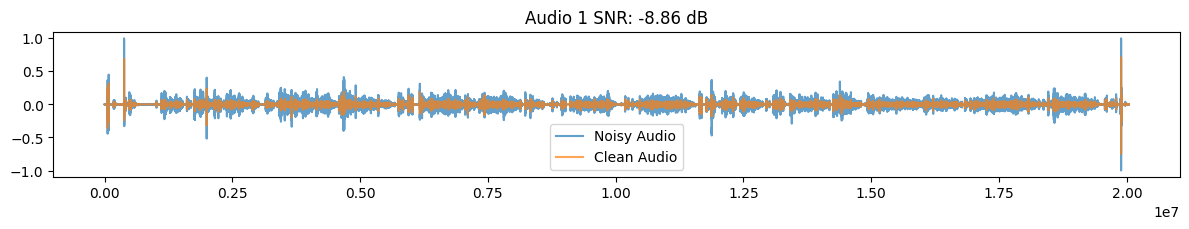

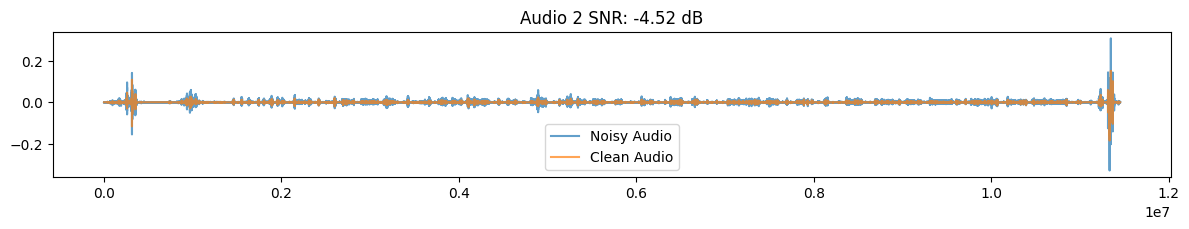

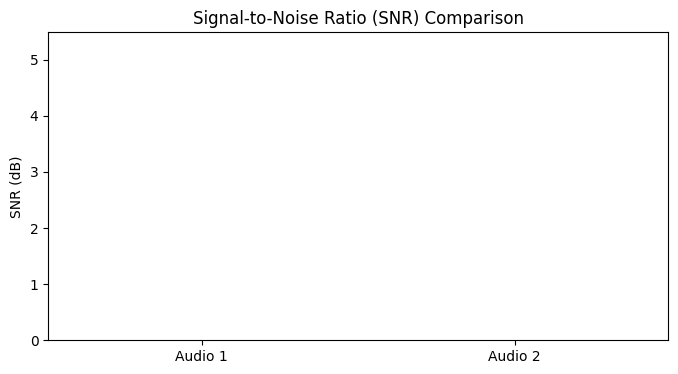

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_folder_path = '/content/drive/MyDrive/Audio2'
clean_folder_path = '/content/drive/MyDrive/clean_audio'

# Get a list of audio files in the directories
audio_files = os.listdir(audio_folder_path)
clean_files = os.listdir(clean_folder_path)

# Sort the files to ensure consistency
audio_files.sort()
clean_files.sort()

# Initialize lists to store SNR values
snr_values = []

# Process the first two audio files
for i in range(2):
    audio_file = os.path.join(audio_folder_path, audio_files[i])
    clean_file = os.path.join(clean_folder_path, clean_files[i])

    # Load audio files using librosa
    audio, _ = librosa.load(audio_file, sr=None)
    clean_audio, _ = librosa.load(clean_file, sr=None)

    # Calculate SNR
    snr = 10 * np.log10(np.mean(clean_audio**2) / np.mean((audio - clean_audio)**2))
    snr_values.append(snr)

    # Plot the audio waveform
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    plt.plot(audio, label='Noisy Audio', alpha=0.7)
    plt.plot(clean_audio, label='Clean Audio', alpha=0.7)
    plt.legend()
    plt.title(f'Audio {i + 1} SNR: {snr:.2f} dB')

    plt.tight_layout()
    plt.show()

# Plot SNR values
plt.figure(figsize=(8, 4))
plt.bar(['Audio 1', 'Audio 2'], snr_values)
plt.ylim([0, max(snr_values) + 10])
plt.ylabel('SNR (dB)')
plt.title('Signal-to-Noise Ratio (SNR) Comparison')
plt.show()
